# Unsupervised Machine Learning Final Project

The Iris dataset is a well-known dataset in the machine learning community, consisting of 150 observations of iris flowers, each with four features: sepal length, sepal width, petal length, and petal width. The goal of this project is to apply unsupervised learning techniques to identify the different species of iris flowers based on these features.

In this project, we will perform an exploratory data analysis (EDA) to understand the data, build and train clustering models to identify species via measuremnets, evaluate the results, and discuss the findings. I will also discuss the possibility of future work from this model to be applied to a model where species identification can be achieved via picture submission where measurements are extracted from uploaded pictures.

### Exploratory Data Analysis

In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

print(df.head())

print(df.isnull().sum())

print(df.describe())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.0000

Univariate

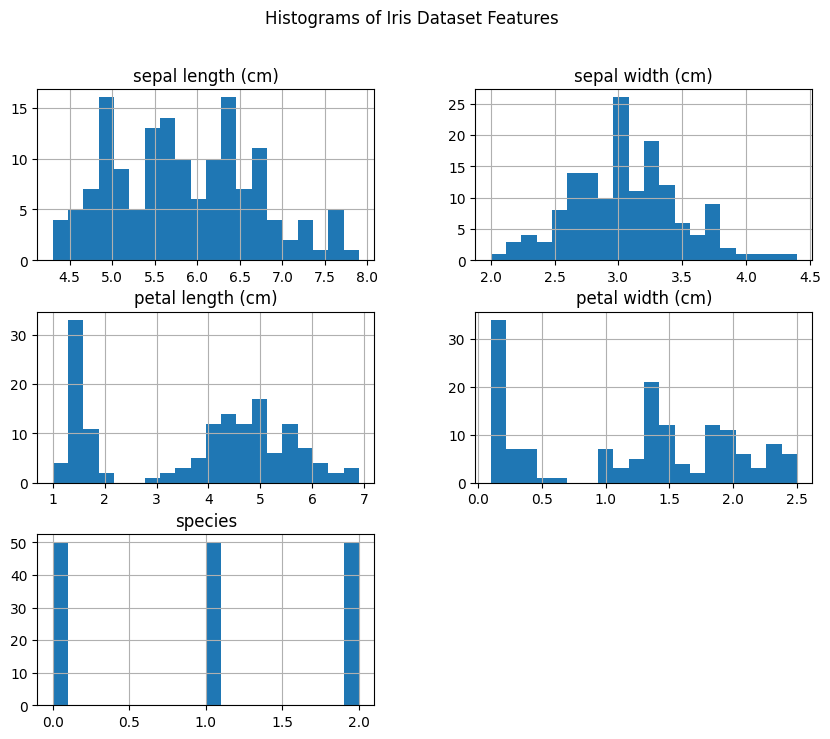

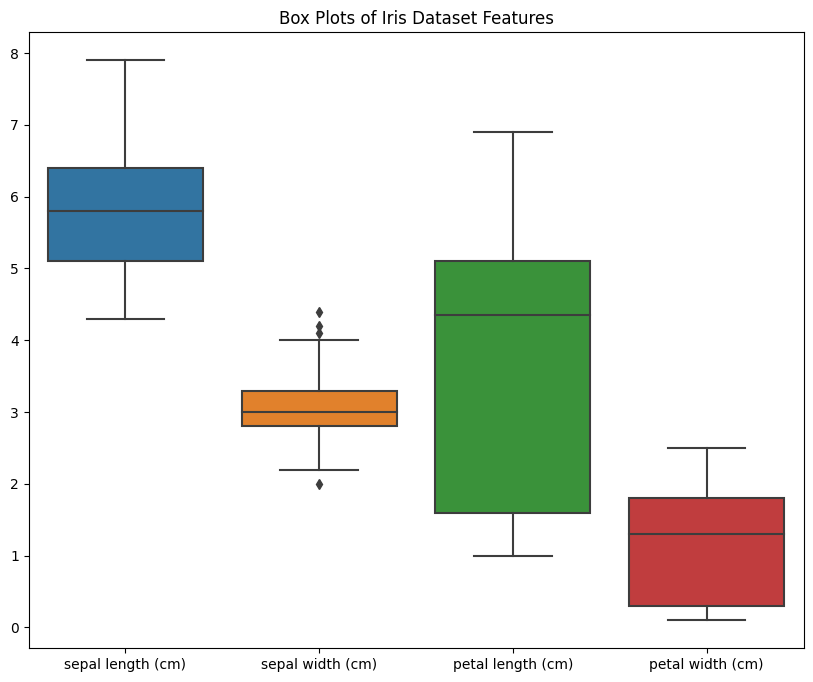

In [22]:
# Histograms for each feature
df.hist(bins=20, figsize=(10, 8))
plt.suptitle("Histograms of Iris Dataset Features")
plt.show()

# Box plots for each feature
plt.figure(figsize=(10, 8))
sns.boxplot(data=df.drop('species', axis=1))
plt.title("Box Plots of Iris Dataset Features")
plt.show()

Bivariate

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


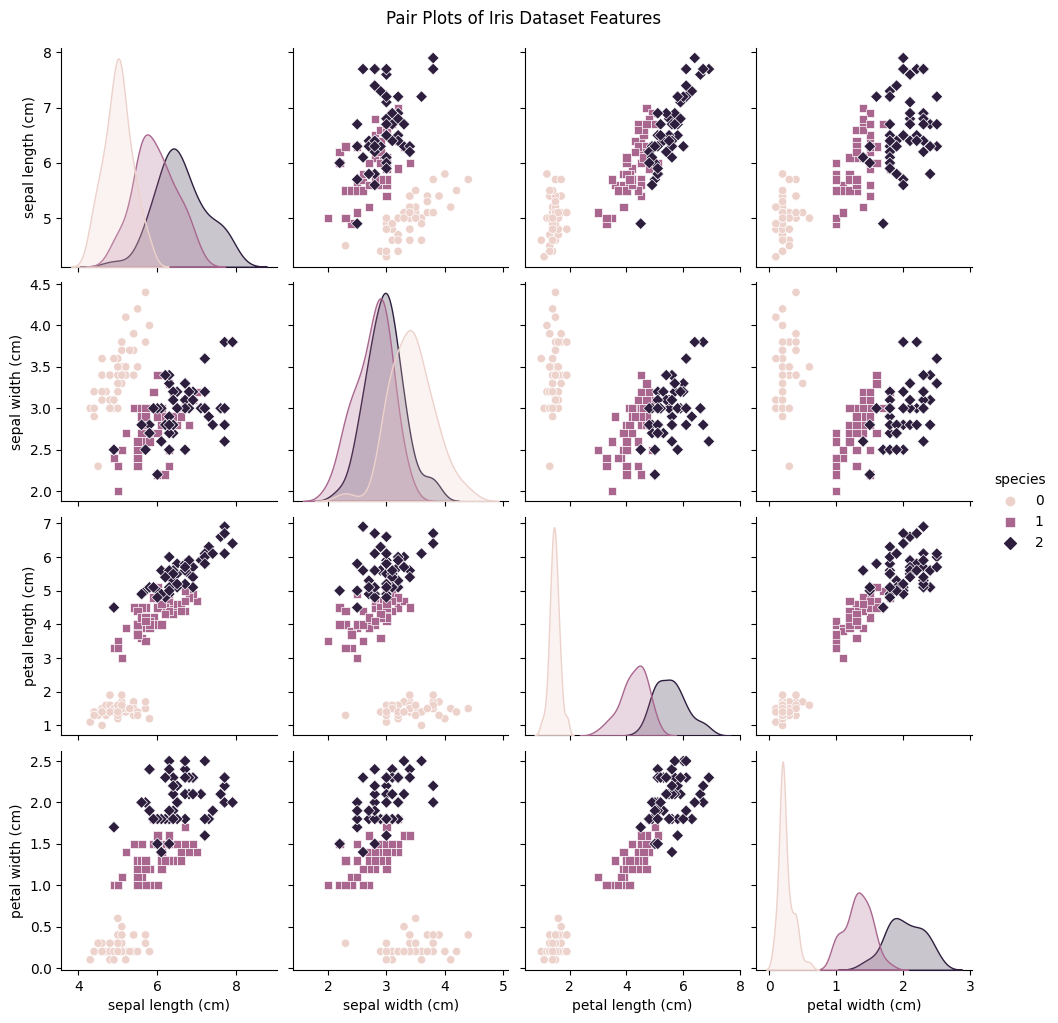

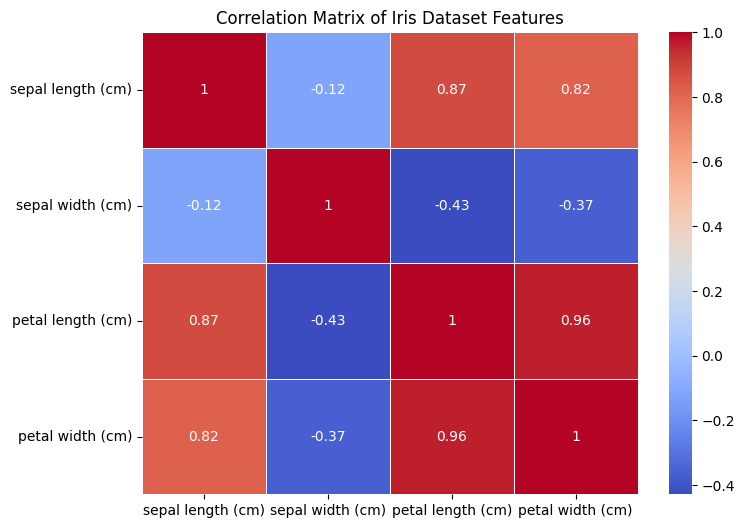

In [23]:
# Pair plots colored by species
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pair Plots of Iris Dataset Features", y=1.02)
plt.show()

# Correlation matrix with heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df.drop('species', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Iris Dataset Features")
plt.show()

Multivariate

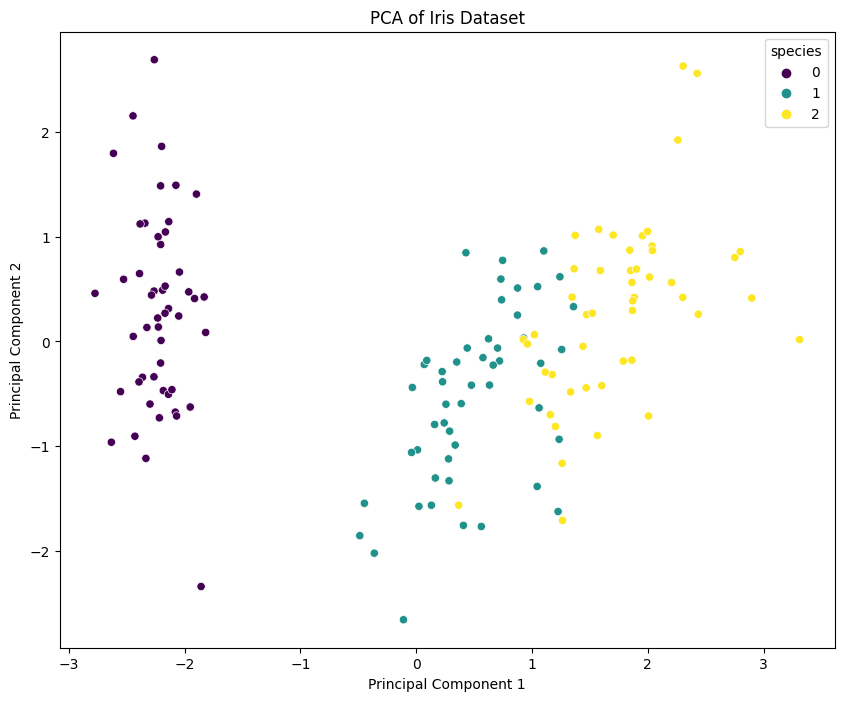

Explained variance by each principal component: [0.72962445 0.22850762]


In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('species', axis=1))

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['species'] = df['species']

# Visualize the PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='species', palette='viridis', data=pca_df)
plt.title("PCA of Iris Dataset")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each principal component:", explained_variance)

### Analysis and Model Building

Cluster distribution for K-Means Clustering:
Cluster 0:
2    50
1    46
Name: species, dtype: int64
Cluster 1:
0    33
Name: species, dtype: int64
Cluster 2:
0    17
1     4
Name: species, dtype: int64


Cluster distribution for Gaussian Mixture Model:
Cluster 0:
2    50
1    48
Name: species, dtype: int64
Cluster 1:
0    45
Name: species, dtype: int64
Cluster 2:
0    5
1    2
Name: species, dtype: int64


Cluster distribution for Agglomerative Clustering:
Cluster 0:
2    48
1    23
Name: species, dtype: int64
Cluster 1:
0    49
Name: species, dtype: int64
Cluster 2:
1    27
2     2
0     1
Name: species, dtype: int64


Model: K-Means Clustering
[[33 17  0]
 [ 0  4 46]
 [ 0  0 50]]
              precision    recall  f1-score   support

           0       1.00      0.66      0.80        50
           1       0.19      0.08      0.11        50
           2       0.52      1.00      0.68        50

    accuracy                           0.58       150
   macro avg       0.57      0.58    

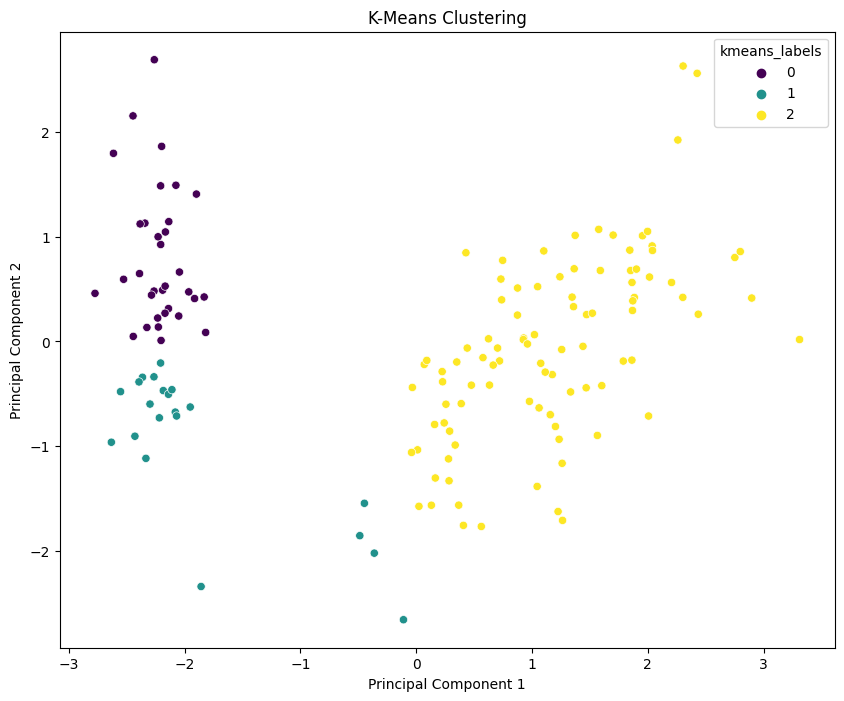

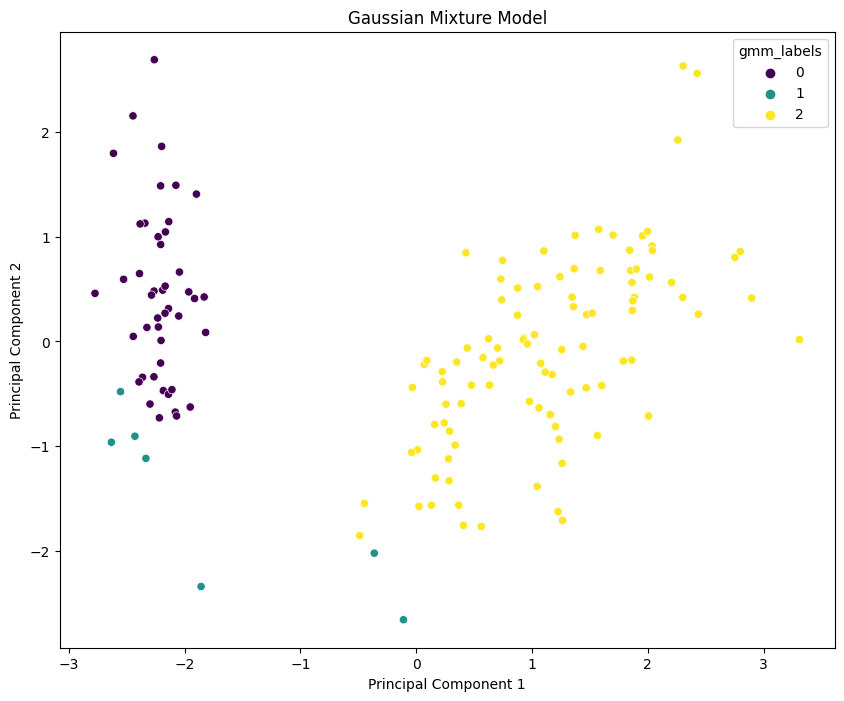

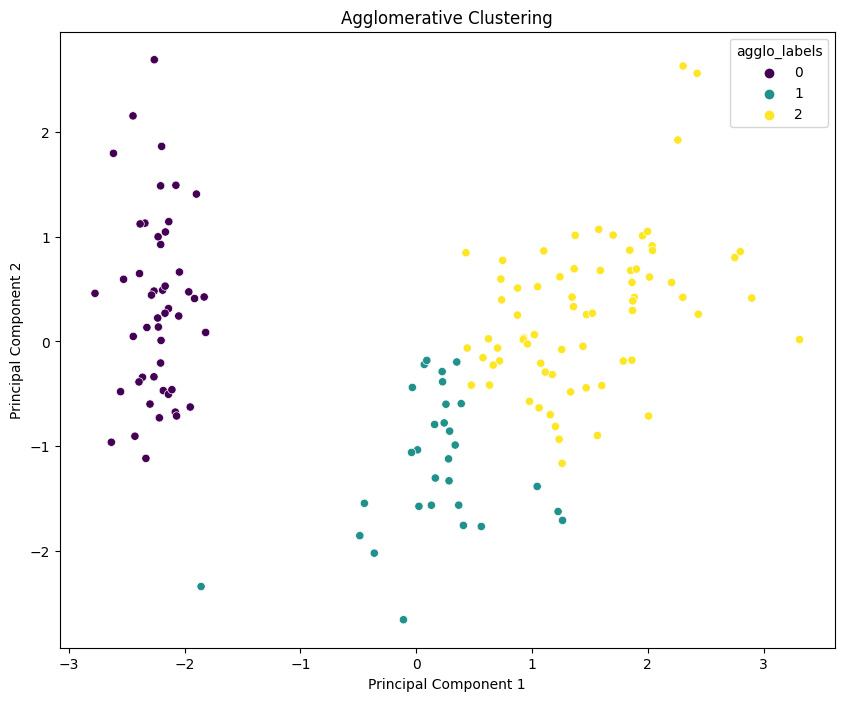

In [47]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)

def print_cluster_distribution(true_labels, predicted_labels, model_name):
    print(f"Cluster distribution for {model_name}:")
    for i in np.unique(predicted_labels):
        mask = (predicted_labels == i)
        print(f"Cluster {i}:")
        print(pd.Series(true_labels[mask]).value_counts())
    print("\n")

print_cluster_distribution(df['species'], kmeans_labels, 'K-Means Clustering')
print_cluster_distribution(df['species'], gmm_labels, 'Gaussian Mixture Model')
print_cluster_distribution(df['species'], agglo_labels, 'Agglomerative Clustering')

def map_labels(true_labels, predicted_labels):
    from scipy.stats import mode
    labels = np.zeros_like(predicted_labels)
    for i in np.unique(predicted_labels):
        mask = (predicted_labels == i)
        labels[mask] = mode(true_labels[mask])[0]
    return labels

mapped_kmeans_labels = np.zeros_like(kmeans_labels)
mapped_kmeans_labels[kmeans_labels == 0] = 2
mapped_kmeans_labels[kmeans_labels == 1] = 0
mapped_kmeans_labels[kmeans_labels == 2] = 1

mapped_gmm_labels = np.zeros_like(gmm_labels)
mapped_gmm_labels[gmm_labels == 0] = 2
mapped_gmm_labels[gmm_labels == 1] = 0
mapped_gmm_labels[gmm_labels == 2] = 1

mapped_agglo_labels = np.zeros_like(agglo_labels)
mapped_agglo_labels[agglo_labels == 0] = 2
mapped_agglo_labels[agglo_labels == 1] = 0
mapped_agglo_labels[agglo_labels == 2] = 1

# Evaluate models
def evaluate_model(true_labels, predicted_labels, model_name):
    print(f"Model: {model_name}")
    print(confusion_matrix(true_labels, predicted_labels))
    print(classification_report(true_labels, predicted_labels))
    print("\n")

# Evaluation
evaluate_model(df['species'], mapped_kmeans_labels, 'K-Means Clustering')
evaluate_model(df['species'], mapped_gmm_labels, 'Gaussian Mixture Model')
evaluate_model(df['species'], mapped_agglo_labels, 'Agglomerative Clustering')

# Visualize the clustering results
def plot_clusters(labels, title):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PCA1', y='PCA2', hue=labels, palette='viridis', data=pca_df)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Plotting the clusters
pca_df['kmeans_labels'] = mapped_kmeans_labels
pca_df['gmm_labels'] = mapped_gmm_labels
pca_df['agglo_labels'] = mapped_agglo_labels

plot_clusters(pca_df['kmeans_labels'], 'K-Means Clustering')
plot_clusters(pca_df['gmm_labels'], 'Gaussian Mixture Model')
plot_clusters(pca_df['agglo_labels'], 'Agglomerative Clustering')


Results for K-Means:
Silhouette Score: 0.45994823920518635
Davies-Bouldin Score: 0.8335949464754338
Calinski-Harabasz Score: 241.90440170183157


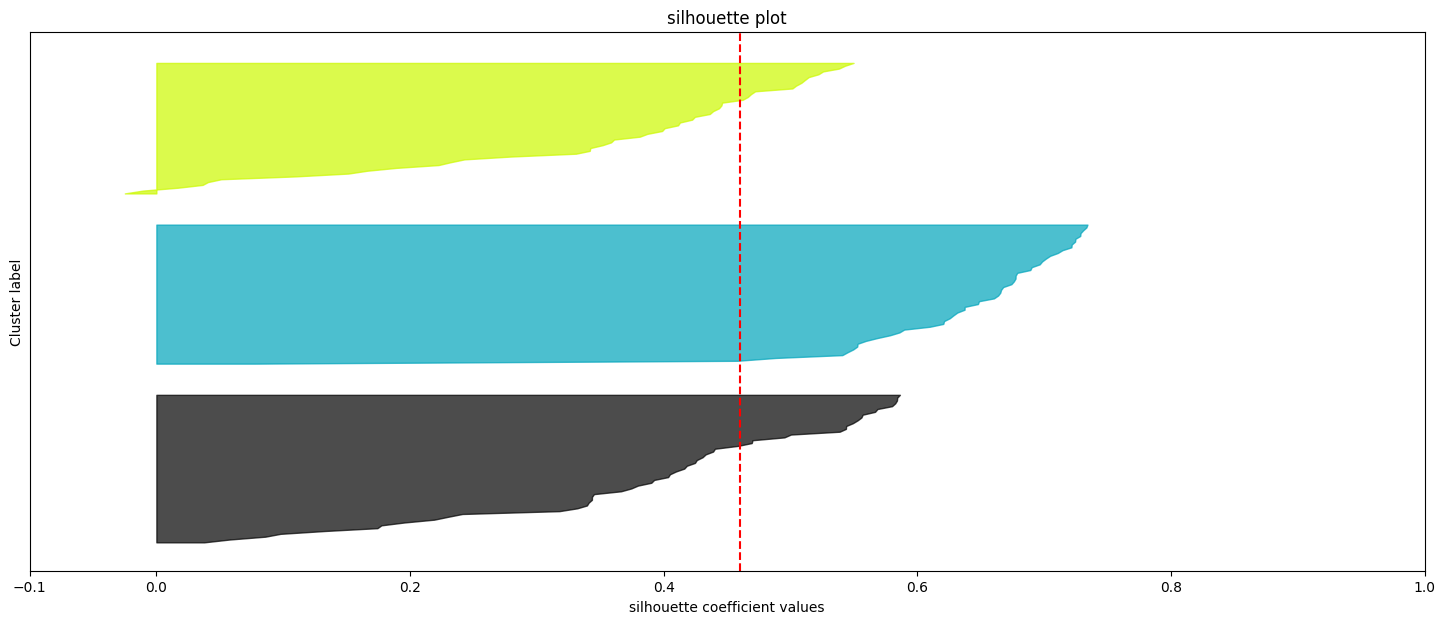

Results for Gaussian Mixture:
Silhouette Score: 0.4751434694267145
Davies-Bouldin Score: 0.8867145279087012
Calinski-Harabasz Score: 141.23147584476084


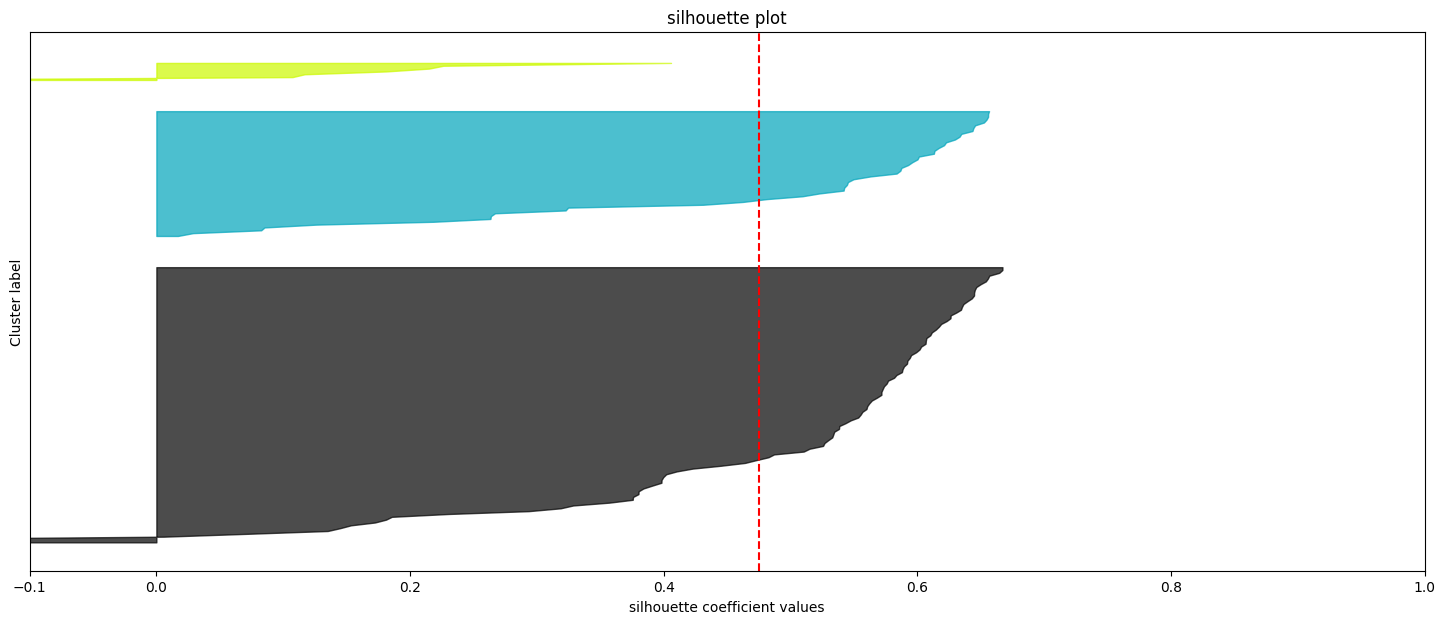

K-Means Stability Scores: [0.4579932493284328, 0.42690550162056323, 0.4331536184998228, 0.46680129715685725, 0.4960166276005875, 0.4959983874689852, 0.47030090782300554, 0.45658142064241325, 0.49915343340880364, 0.5349217089672644]


In [46]:
models = {
    'K-Means': KMeans(n_clusters=3, n_init=10, random_state=42),
    'Gaussian Mixture': GaussianMixture(n_components=3, random_state=42)
}

def evaluate_clustering(models, X):
    results = {}
    for name, model in models.items():
        labels = model.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)
        calinski_harabasz = calinski_harabasz_score(X, labels)

        results[name] = {
            'labels': labels,
            'silhouette_score': silhouette_avg,
            'davies_bouldin_score': davies_bouldin,
            'calinski_harabasz_score': calinski_harabasz
        }
    return results

results = evaluate_clustering(models, X_scaled)

def plot_silhouette_diagrams(X, labels, n_clusters):
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    silhouette_vals = silhouette_samples(X, labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = silhouette_vals[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper + 10
    
    ax1.set_title("silhouette plot")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_score(X, labels), color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

for name, res in results.items():
    print(f"Results for {name}:")
    print(f"Silhouette Score: {res['silhouette_score']}")
    print(f"Davies-Bouldin Score: {res['davies_bouldin_score']}")
    print(f"Calinski-Harabasz Score: {res['calinski_harabasz_score']}")
    plot_silhouette_diagrams(X_scaled, res['labels'], 3)
    plt.show()

def stability_testing(model, X, n_iterations=10):
    stability_scores = []
    for _ in range(n_iterations):
        X_resampled = resample(X)
        labels = model.fit_predict(X_resampled)
        score = silhouette_score(X_resampled, labels)
        stability_scores.append(score)
    return stability_scores

kmeans_stability_scores = stability_testing(models['K-Means'], X_scaled)
print("K-Means Stability Scores:", kmeans_stability_scores)


### Discussion

In my analysis of the Iris dataset using various clustering algorithms, the Gaussian Mixture Model (GMM) emerged as the most effective. It achieved a silhouette score of 0.4751, indicating a reasonably good level of separation between clusters. Although this score is slightly lower than that achieved by the K-Means model, the GMM's strength lies in its ability to manage overlaps and probabilistically assign cluster memberships, a capability especially valuable for datasets like Iris where class boundaries are not distinctly defined. The cluster distribution from the GMM demonstrated a clear segregation of one species into a single cluster with minimal confusion between the other two, showcasing its superior ability to capture the inherent structure of the data.

Conversely, while K-Means showed a slightly higher silhouette score of 0.4599, it exhibited significant overlap in the clustering of the Versicolor and Virginica species. Notably, the Davies-Bouldin score for K-Means was lower at 0.8336 compared to 0.8867 for GMM, suggesting better compactness and separation of clusters, despite GMM's overall performance. The Calinski-Harabasz score, which favors denser clusters, was significantly higher for K-Means at 241.90 versus 141.23 for GMM, indicating that K-Means forms tighter clusters. However, the stability testing of K-Means revealed variations in the silhouette scores, pointing to potential sensitivity to initial conditions and data perturbations. These insights reinforce the GMM’s robustness and its suitability for this dataset due to its flexibility in adapting to different data shapes and densities.

For future work, fine-tuning these models could enhance accuracy further. An exciting direction could involve allowing the upload of image files to the model, with capabilities to measure the lengths of petals and sepals, and perhaps even analyze color, feeding these measurements into the unsupervised model to determine species. Implementing a tool like OpenCV could facilitate this but would require building extensive training datasets containing images to achieve the desired level of accuracy. This approach would bridge traditional botany with advanced machine learning techniques, opening new avenues for automated plant classification.